# Section C - Library Implementations

## Logistic Regression Variants

### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, confusion_matrix, roc_curve, roc_auc_score


### Import Dataset

In [15]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
names_list = pd.read_csv("names_list.csv")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_array = y_train.to_numpy().ravel()
y_test_array  = y_test.to_numpy().ravel()

### Logistics regression Implementation

In [17]:
# Logistic Regression (No regularization)
log_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)
log_reg.fit(X_train_scaled, y_train_array)

y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Logistic Regression with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=10000)
log_reg_l1.fit(X_train_scaled, y_train_array)

y_pred_l1 = log_reg_l1.predict(X_test_scaled)
y_prob_l1 = log_reg_l1.predict_proba(X_test_scaled)[:, 1]

# Logistic Regression with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=10000)
log_reg_l2.fit(X_train_scaled, y_train_array)

y_pred_l2 = log_reg_l2.predict(X_test_scaled)
y_prob_l2 = log_reg_l2.predict_proba(X_test_scaled)[:, 1]


### Decision Tree Implementation

In [ ]:
# Shallow tree
tree_shallow = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_shallow.fit(X_train_scaled, y_train_array)
y_pred_tree_shallow = tree_shallow.predict(X_test_scaled)
y_prob_tree_shallow = tree_shallow.predict_proba(X_test_scaled)[:,1]

# Deep tree
tree_deep = DecisionTreeClassifier(max_depth=12, random_state=42)
tree_deep.fit(X_train_scaled, y_train_array)
y_pred_tree_deep = tree_deep.predict(X_test_scaled)
y_prob_tree_deep = tree_deep.predict_proba(X_test_scaled)[:,1]

### Ensemble Methods Implementation

In [ ]:
# Bagging with decision trees
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=10,
    random_state=42
)
bagging.fit(X_train, y_train_array)
y_pred_bag = bagging.predict(X_test)
y_prob_bag = bagging.predict_proba(X_test)[:,1]

# AdaBoost
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
adaboost.fit(X_train, y_train_array)
y_pred_adaboost = adaboost.predict(X_test)
y_prob_adaboost = adaboost.predict_proba(X_test)[:,1]

# Gradient Boosting
grad_boost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

grad_boost.fit(X_train, y_train_array)
y_pred_gb = grad_boost.predict(X_test)
y_prob_gb = grad_boost.predict_proba(X_test)[:,1]

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train, y_train_array)
y_pred_rf = randomforest.predict(X_test)
y_prob_rf = randomforest.predict_proba(X_test)[:,1]

### Logistics regression Evaluation

In [ ]:


# Build evaluation table
metrics = {
    "Model": ["Logistic Regression (No Penalty)", "Logistic Regression (L1)", "Logistic Regression (L2)"],
    "Precision": [
        precision_score(y_test_array, y_pred_log),
        precision_score(y_test_array, y_pred_l1),
        precision_score(y_test_array, y_pred_l2),
    ],
    "Recall": [
        recall_score(y_test_array, y_pred_log),
        recall_score(y_test_array, y_pred_l1),
        recall_score(y_test_array, y_pred_l2),
    ],
    "F1 Score": [
        f1_score(y_test_array, y_pred_log),
        f1_score(y_test_array, y_pred_l1),
        f1_score(y_test_array, y_pred_l2),
    ],
    "Accuracy": [
        accuracy_score(y_test_array, y_pred_log),
        accuracy_score(y_test_array, y_pred_l1),
        accuracy_score(y_test_array, y_pred_l2),
    ],
    "ROC AUC": [
        roc_auc_score(y_test_array, y_prob_log),
        roc_auc_score(y_test_array, y_prob_l1),
        roc_auc_score(y_test_array, y_prob_l2),
    ]
}

pd.DataFrame(metrics).round(3)




,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC
0,Logistic Regression (No Penalty),0.771,0.73,0.75,0.799,0.881
1,Logistic Regression (L1),0.771,0.73,0.75,0.799,0.880
2,Logistic Regression (L2),0.771,0.73,0.75,0.799,0.880


[[89 16]
 [20 54]]


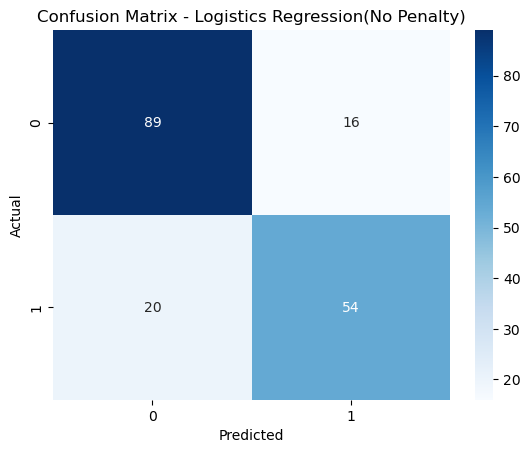

[[89 16]
 [20 54]]


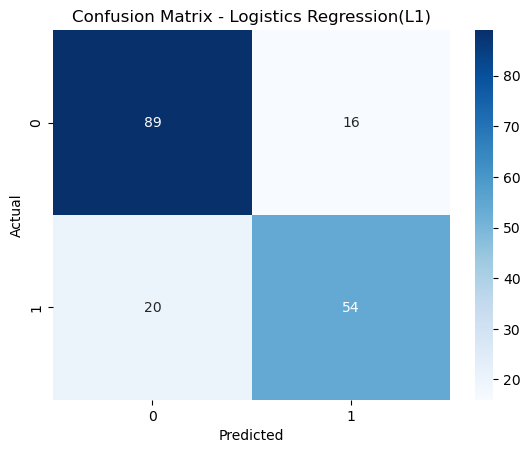

[[89 16]
 [20 54]]


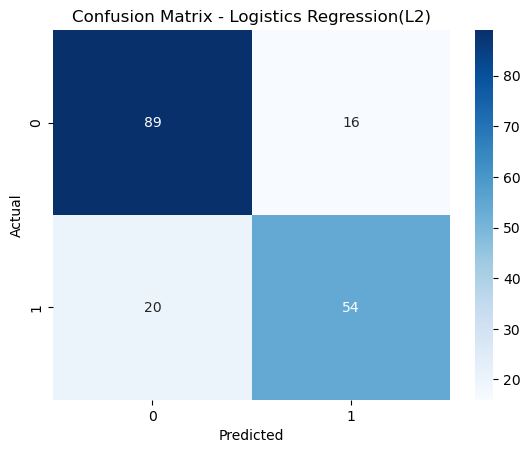

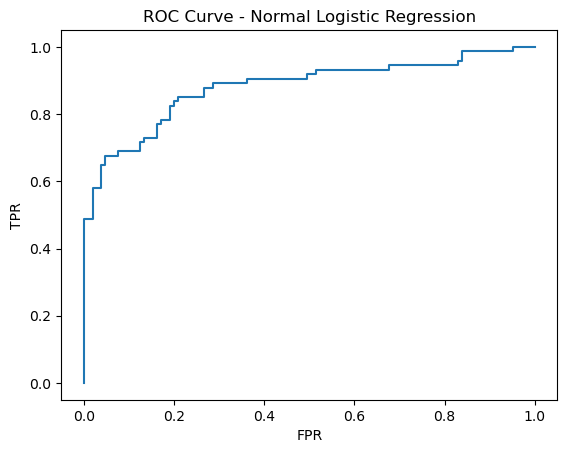

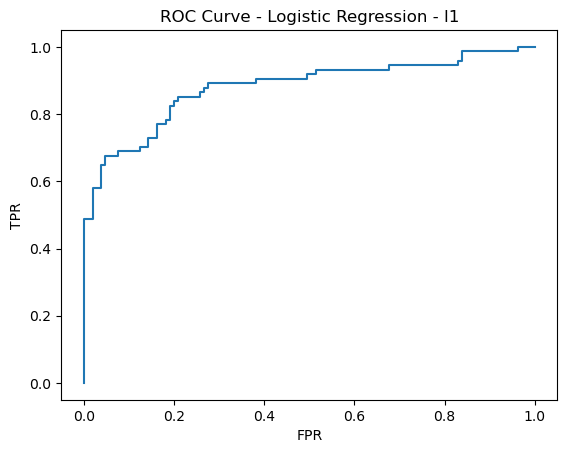

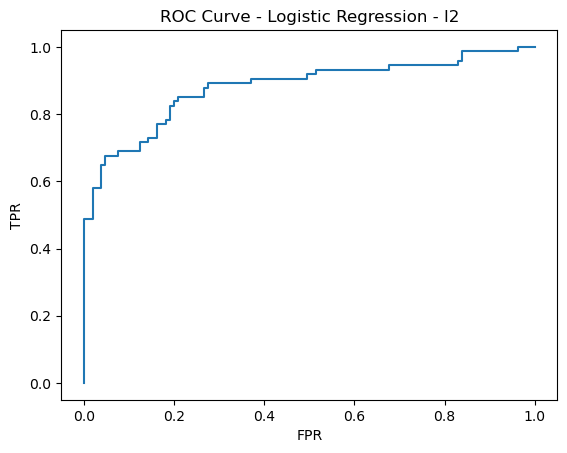

In [ ]:
# Confusion Matrix - Normal
cm = confusion_matrix(y_test_array, y_pred_log)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Logistics Regression(No Penalty)')
plt.show()



# Confusion Matrix - L1
cm = confusion_matrix(y_test_array, y_pred_l1)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Logistics Regression(L1)')
plt.show()



# Confusion Matrix - L2
cm = confusion_matrix(y_test_array, y_pred_l2)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Logistics Regression(L2)')
plt.show()

# ROC Curve
fpr_log, tpr_log, L = roc_curve(y_test_array, y_prob_log)
plt.plot(fpr_log, tpr_log, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Normal Logistic Regression")
plt.show()

fpr_log_L1, tpr_log_L1, L1 = roc_curve(y_test_array, y_prob_l1)
plt.plot(fpr_log_L1, tpr_log_L1, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Logistic Regression - l1")
plt.show()

fpr_log_L2, tpr_log_L2, L2 = roc_curve(y_test_array, y_prob_l2)
plt.plot(fpr_log_L2, tpr_log_L2, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Logistic Regression - l2")
plt.show()




### Decision trees Evaluation

In [ ]:
# Build evaluation table
metrics = {
    "Model": ["Shallow tree", "Deep tree"],
    "Precision": [
        precision_score(y_test_array, y_pred_tree_shallow),
        precision_score(y_test_array, y_pred_tree_deep),
        
    ],
    "Recall": [
        recall_score(y_test_array, y_pred_tree_shallow),
        recall_score(y_test_array, y_pred_tree_deep),
       
    ],
    "F1 Score": [
        f1_score(y_test_array, y_pred_tree_shallow),
        f1_score(y_test_array, y_pred_tree_deep),
        
    ],
    "Accuracy": [
        accuracy_score(y_test_array, y_pred_tree_shallow),
        accuracy_score(y_test_array, y_pred_tree_deep),
        
    ],
    "ROC AUC": [
        roc_auc_score(y_test_array, y_prob_tree_shallow),
        roc_auc_score(y_test_array, y_prob_tree_deep),
    ]
}


pd.DataFrame(metrics).round(3)







,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC
0,Shallow tree,0.754,0.703,0.727,0.782,0.770
1,Deep tree,0.776,0.703,0.738,0.793,0.818


[[88 17]
 [22 52]]


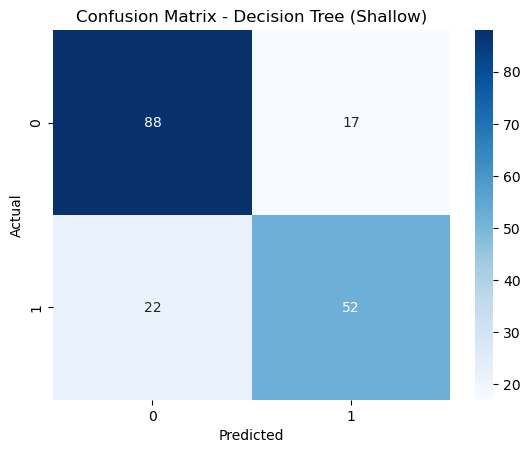

[[90 15]
 [22 52]]


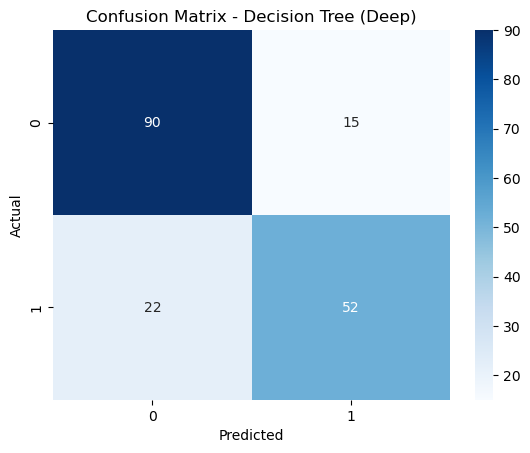

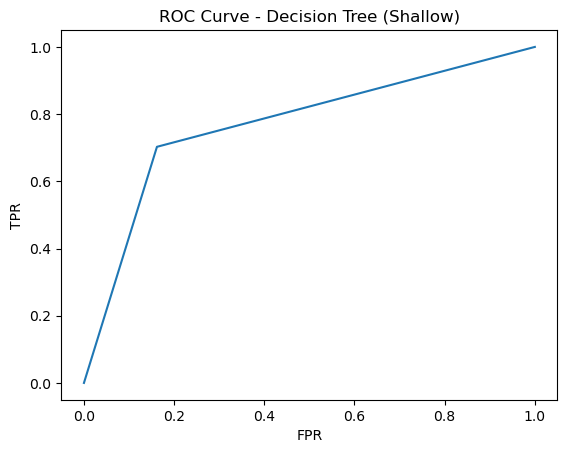

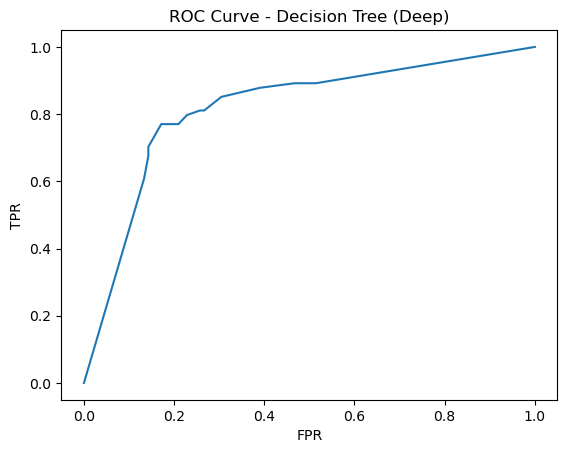

In [ ]:
# Confusion Matrix - Shallow Tree
cm_shallow = confusion_matrix(y_test_array, y_pred_tree_shallow)
print(cm_shallow)

sns.heatmap(cm_shallow, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Decision Tree (Shallow)')
plt.show()

# Confusion Matrix - Deep Tree
cm_deep = confusion_matrix(y_test_array, y_pred_tree_deep)
print(cm_deep)

sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Decision Tree (Deep)')
plt.show()

# ROC Curve - Shallow Tree
fpr_shallow, tpr_shallow, _ = roc_curve(y_test_array, y_prob_tree_shallow)
plt.plot(fpr_shallow, tpr_shallow, label='Shallow Tree')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Decision Tree (Shallow)")
plt.show()

# ROC Curve - Deep Tree
fpr_deep, tpr_deep, _ = roc_curve(y_test_array, y_prob_tree_deep)
plt.plot(fpr_deep, tpr_deep, label='Deep Tree')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Decision Tree (Deep)")
plt.show()

### Bagging Methonds Evaluation

In [ ]:
# Build evaluation table
metrics = {
    "Model": ["Bagging", "AdaBoost", "GradientBoosting", "RandomForest"],
    "Precision": [
        precision_score(y_test_array, y_pred_bag),
        precision_score(y_test_array, y_pred_adaboost),
        precision_score(y_test_array, y_pred_gb),
        precision_score(y_test_array, y_pred_rf),
    ],
    "Recall": [
        recall_score(y_test_array, y_pred_bag),
        recall_score(y_test_array, y_pred_adaboost),
        recall_score(y_test_array, y_pred_gb),
        recall_score(y_test_array, y_pred_rf),
    ],
    "F1 Score": [
        f1_score(y_test_array, y_pred_bag),
        f1_score(y_test_array, y_pred_adaboost),
        f1_score(y_test_array, y_pred_gb),
        f1_score(y_test_array, y_pred_rf),
    ],
    "Accuracy": [
        accuracy_score(y_test_array, y_pred_bag),
        accuracy_score(y_test_array, y_pred_adaboost),
        accuracy_score(y_test_array, y_pred_gb),
        accuracy_score(y_test_array, y_pred_rf),
    ],
    "ROC AUC": [
        roc_auc_score(y_test_array, y_prob_bag),
        roc_auc_score(y_test_array, y_prob_adaboost),
        roc_auc_score(y_test_array, y_prob_gb),
        roc_auc_score(y_test_array, y_prob_rf),
    ]
}

pd.DataFrame(metrics).round(3)


,Model,Precision,Recall,F1 Score,Accuracy,ROC AUC
0,Bagging,0.797,0.689,0.739,0.799,0.859
1,AdaBoost,0.788,0.703,0.743,0.799,0.862
2,GradientBoosting,0.820,0.676,0.741,0.804,0.881
3,RandomForest,0.800,0.757,0.778,0.821,0.888


[[92 13]
 [23 51]]


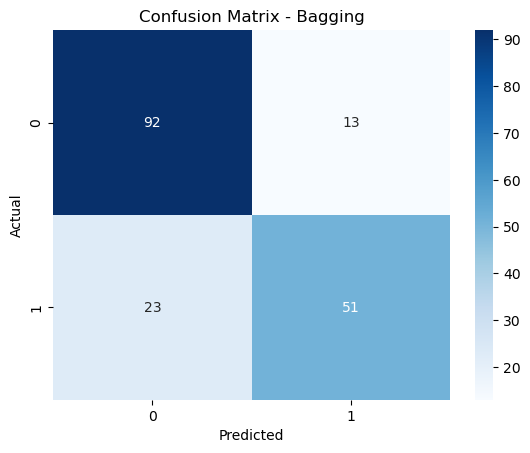

[[91 14]
 [22 52]]


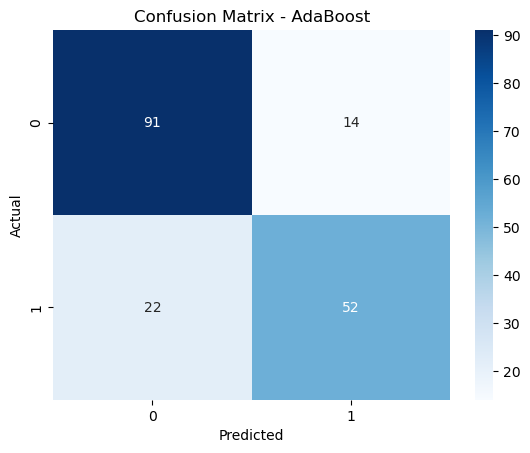

[[94 11]
 [24 50]]


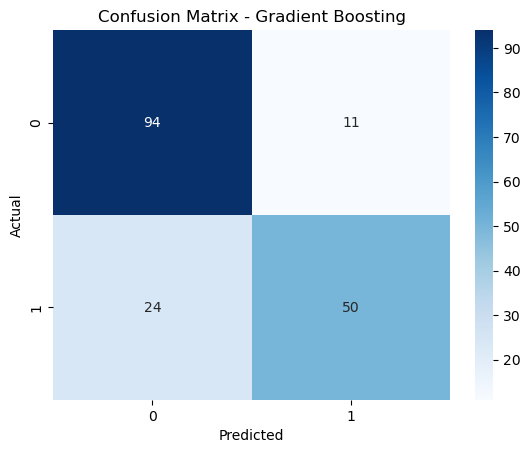

[[91 14]
 [18 56]]


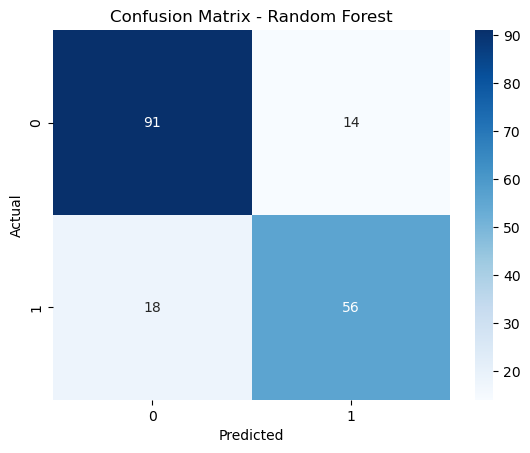

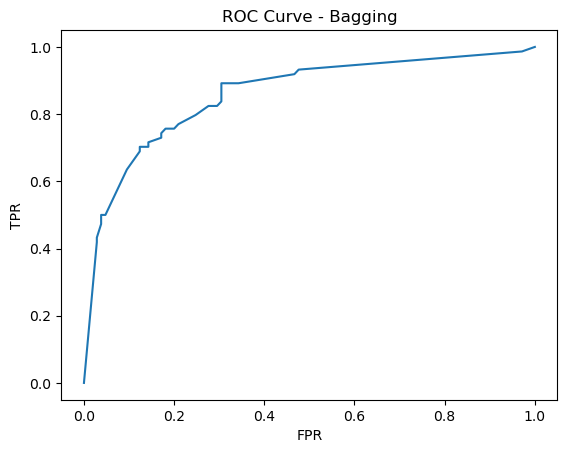

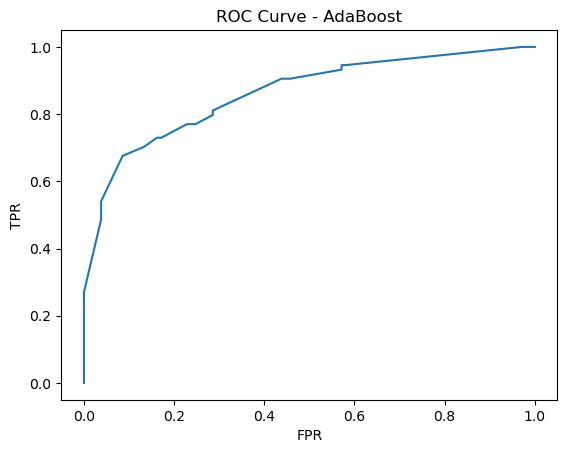

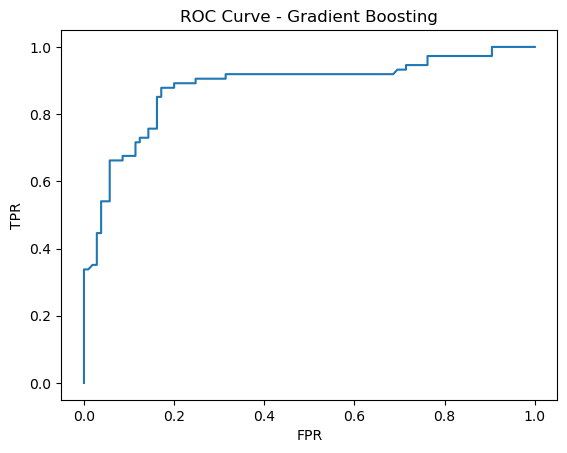

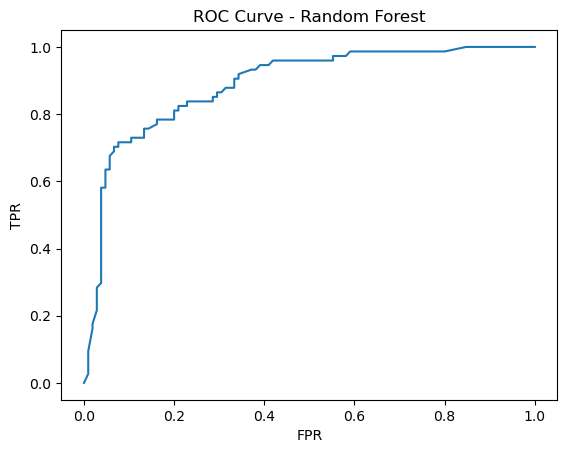

In [ ]:
# Confusion Matrix - Bagging
cm_bag = confusion_matrix(y_test_array, y_pred_bag)
print(cm_bag)
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Bagging')
plt.show()

# Confusion Matrix - AdaBoost
cm_ada = confusion_matrix(y_test_array, y_pred_adaboost)
print(cm_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - AdaBoost')
plt.show()

# Confusion Matrix - Gradient Boosting
cm_gb = confusion_matrix(y_test_array, y_pred_gb)
print(cm_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test_array, y_pred_rf)
print(cm_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve - Bagging
fpr_bag, tpr_bag, _ = roc_curve(y_test_array, y_prob_bag)
plt.plot(fpr_bag, tpr_bag, label='Bagging')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Bagging")
plt.show()

# ROC Curve - AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test_array, y_prob_adaboost)
plt.plot(fpr_ada, tpr_ada, label='AdaBoost')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - AdaBoost")
plt.show()

# ROC Curve - Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test_array, y_prob_gb)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Gradient Boosting")
plt.show()

# ROC Curve - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_array, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel("FPR")
plt.ylabel("TPR")   
plt.title("ROC Curve - Random Forest")
plt.show()